<a href="https://colab.research.google.com/github/Nursatt/success_project_yolov8/blob/main/yolov8_fire_and_smoke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
MY_SECRET_KEY="ztxhFxdsZHZcp6IxFVEy"

In [3]:
# !pip install ultralytics
# !pip install roboflow

  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


In [2]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="ztxhFxdsZHZcp6IxFVEy")
project = rf.workspace("object-detection-for-umi").project("fire_smoke_detection-4ypoh")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.26, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fire_Smoke_Detection-1 in yolov8:: 100%|██████████| 3802/3802 [00:03<00:00, 1169.29it/s]


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=Fire_Smoke_Detection-1/data.yaml epochs=1 imgsz=640 plots=True device=cpu

100% 21.5M/21.5M [00:00<00:00, 151MB/s]
Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=Fire_Smoke_Detection-1/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

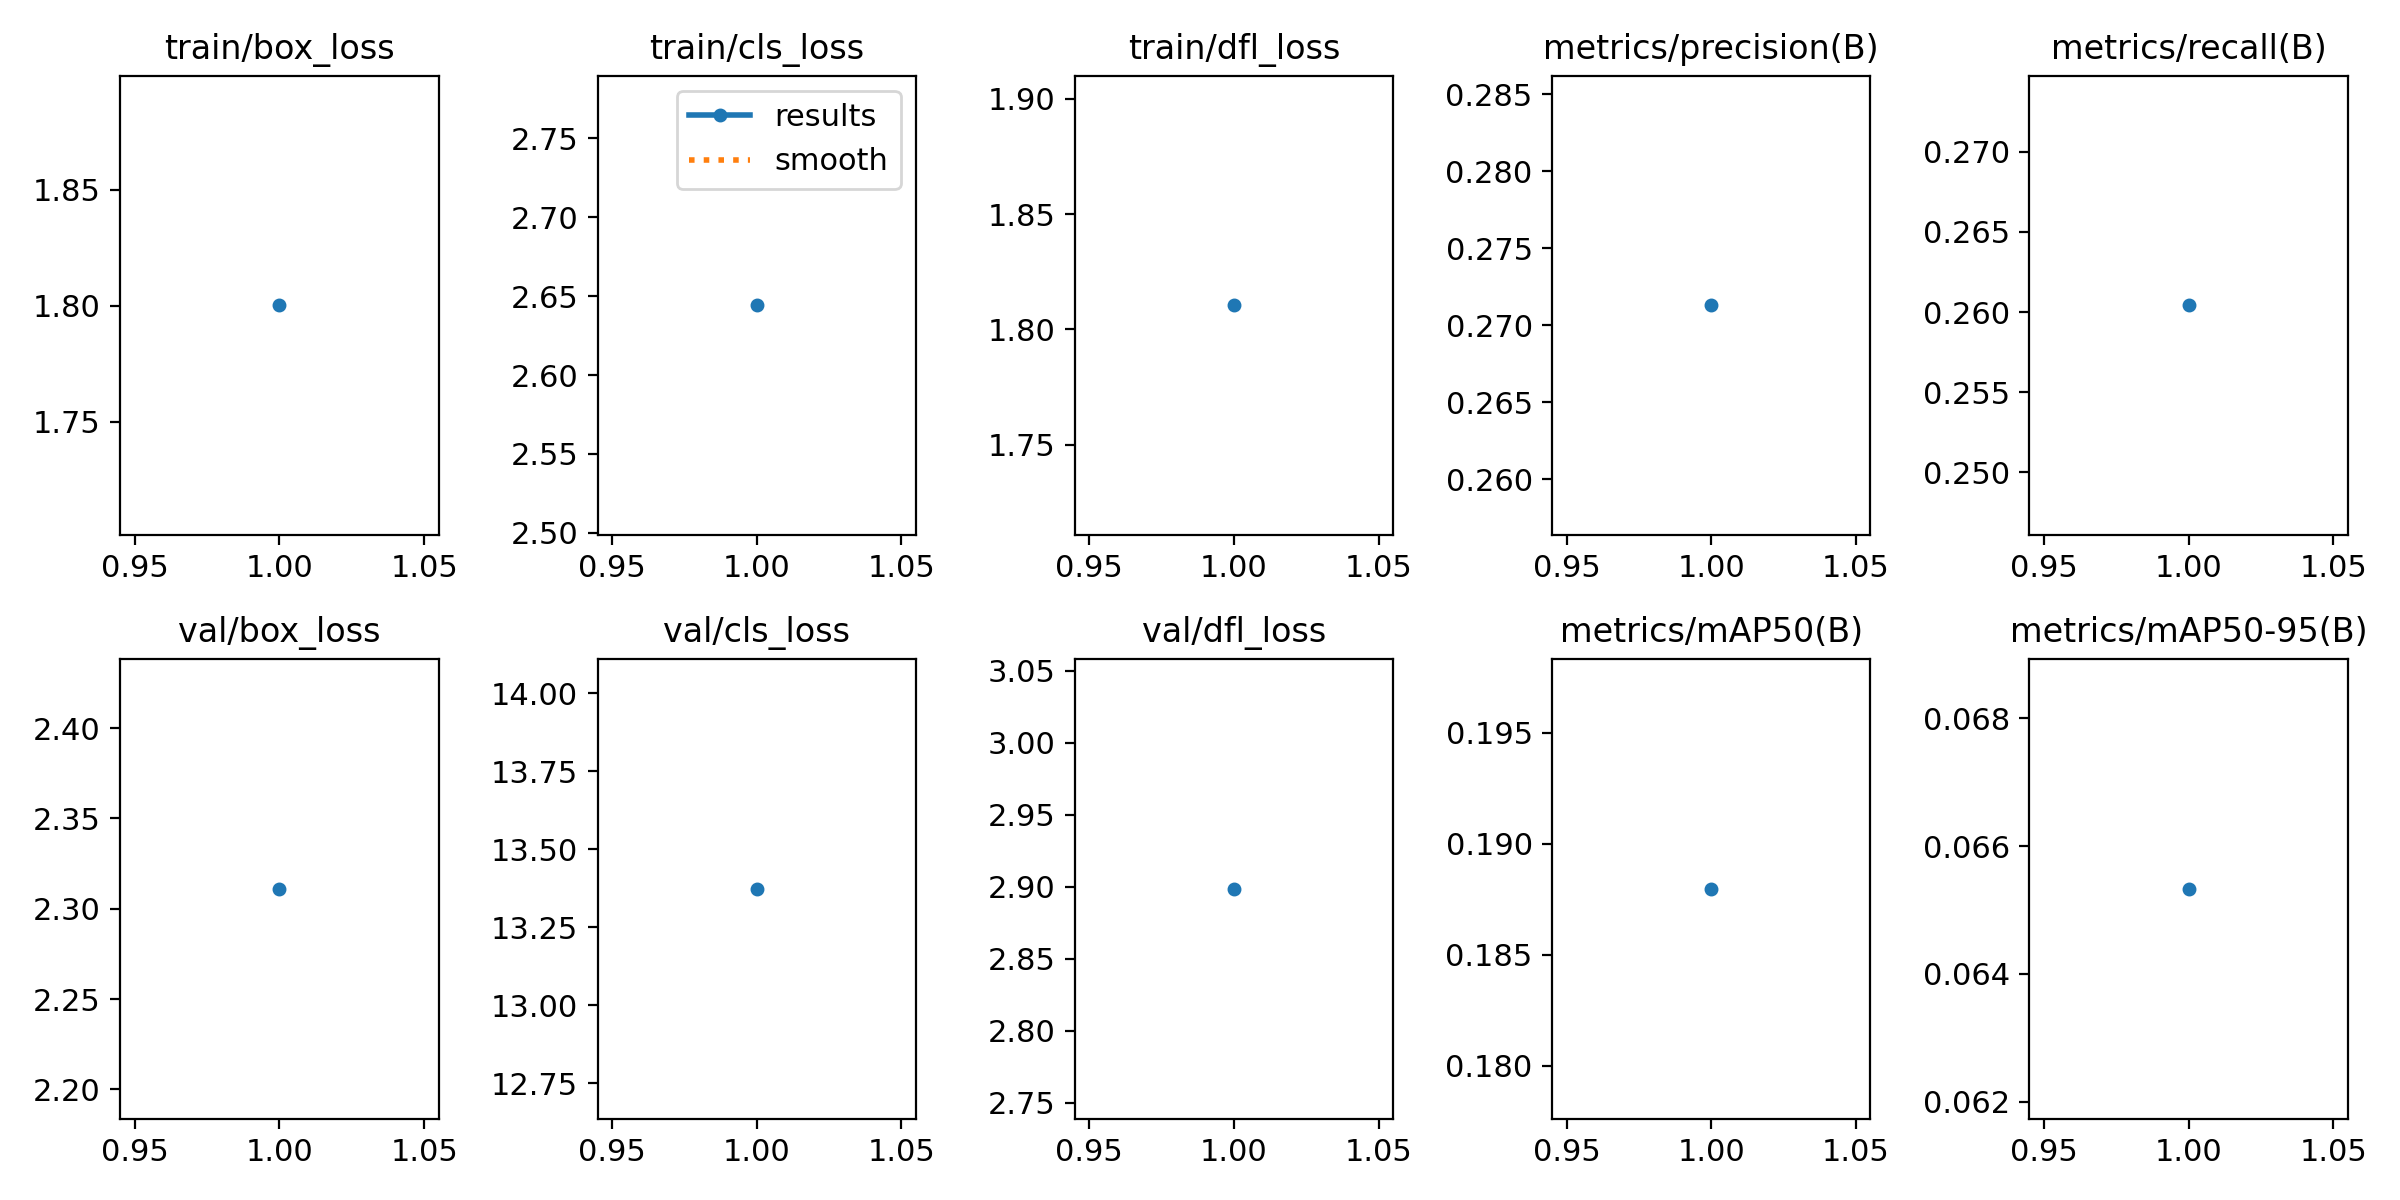

In [6]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [7]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/Fire_Smoke_Detection-1/data.yaml

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Fire_Smoke_Detection-1/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [01:22<00:00, 16.40s/it]
                   all         70         96       0.27       0.26      0.189     0.0651
                 smoke         70         96       0.27       0.26      0.189     0.0651
Speed: 10.4ms preprocess, 1136.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
